In [2]:
import pandas as pd
import numpy as np
from mlxtend.plotting import plot_decision_regions

In [3]:
df = pd.DataFrame()

In [4]:
df['x1'] = [1,2,3,4,5,6,6,7,9,9]
df['x2'] = [5,3,6,8,1,9,5,8,9,2]
df['label'] = [1,1,0,1,0,1,0,1,0,0]

In [5]:
df

,x1,x2,label
0,1,5,1
1,2,3,1
2,3,6,0
3,4,8,1
4,5,1,0
5,6,9,1
6,6,5,0
7,7,8,1
8,9,9,0
9,9,2,0


In [6]:
import seaborn as sns

<Axes: xlabel='x1', ylabel='x2'>

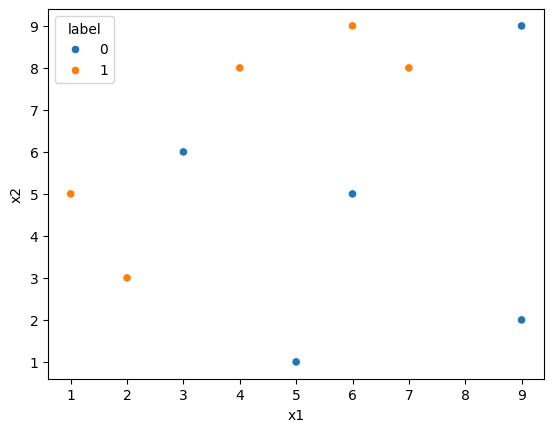

In [7]:
sns.scatterplot(x = df['x1'], y = df['x2'], hue=df['label'])

In [8]:
df['sample weight'] = 1/df.shape[0]

In [9]:
df

,x1,x2,label,sample weight
0,1,5,1,0.1
1,2,3,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
4,5,1,0,0.1
5,6,9,1,0.1
6,6,5,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
9,9,2,0,0.1


In [10]:
from sklearn.tree import DecisionTreeClassifier
dt1 = DecisionTreeClassifier(max_depth=1)

In [11]:
x = df.iloc[:,0:2]
y = df.iloc[:,2]
y

0    1
1    1
2    0
3    1
4    0
5    1
6    0
7    1
8    0
9    0
Name: label, dtype: int64

In [12]:
dt1.fit(x,y)

DecisionTreeClassifier(max_depth=1)

[Text(0.5, 0.75, 'x[0] <= 2.5\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.75, 0.25, 'gini = 0.469\nsamples = 8\nvalue = [5, 3]')]

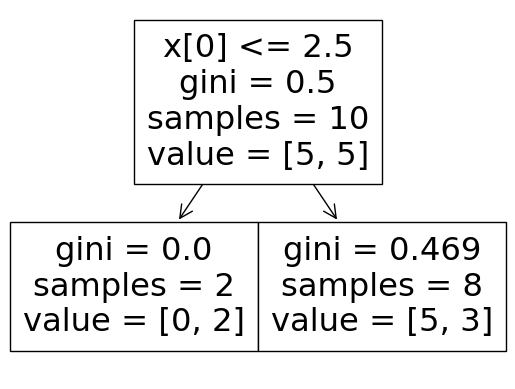

In [13]:
from sklearn.tree import plot_tree
plot_tree(dt1)

e:\Boosting\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


<Axes: >

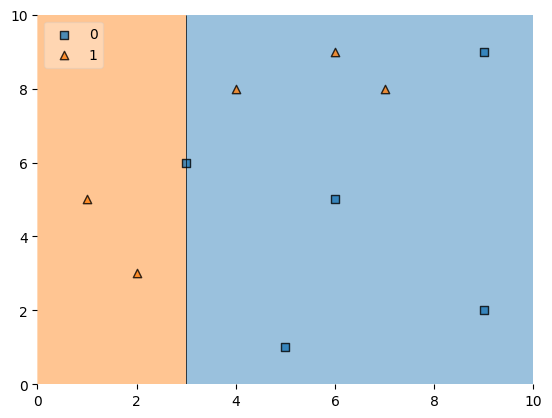

In [14]:
plot_decision_regions(np.array(x),np.array(y),clf=dt1,legend=2)

In [15]:
df['y_pred'] = dt1.predict(x)

In [16]:
df

,x1,x2,label,sample weight,y_pred
0,1,5,1,0.1,1
1,2,3,1,0.1,1
2,3,6,0,0.1,0
3,4,8,1,0.1,0
4,5,1,0,0.1,0
5,6,9,1,0.1,0
6,6,5,0,0.1,0
7,7,8,1,0.1,0
8,9,9,0,0.1,0
9,9,2,0,0.1,0


In [17]:
# performance of the stump
def calculate_model_weight(error):
     return 0.5*np.log((1-error)/error)

In [18]:
alpha1 = calculate_model_weight(0.3)

In [19]:
alpha1

0.42364893019360184

In [20]:
# calculate the updated weight
def update_row_weights(row,alpha = 0.4236):
     if row['label'] == row['y_pred']:
          return row['sample weight']*np.exp(-alpha)
     else:
          return row['sample weight']*np.exp(alpha)

In [21]:
df['updated weights'] = df.apply(update_row_weights, axis = 1)

In [22]:
df

,x1,x2,label,sample weight,y_pred,updated weights
0,1,5,1,0.1,1,0.065469
1,2,3,1,0.1,1,0.065469
2,3,6,0,0.1,0,0.065469
3,4,8,1,0.1,0,0.152745
4,5,1,0,0.1,0,0.065469
5,6,9,1,0.1,0,0.152745
6,6,5,0,0.1,0,0.065469
7,7,8,1,0.1,0,0.152745
8,9,9,0,0.1,0,0.065469
9,9,2,0,0.1,0,0.065469


In [23]:
sum_of_updated_weights = sum(df['updated weights'])


In [24]:
df['normalized weight'] = df['updated weights']/sum_of_updated_weights

In [25]:
df

,x1,x2,label,sample weight,y_pred,updated weights,normalized weight
0,1,5,1,0.1,1,0.065469,0.071432
1,2,3,1,0.1,1,0.065469,0.071432
2,3,6,0,0.1,0,0.065469,0.071432
3,4,8,1,0.1,0,0.152745,0.166659
4,5,1,0,0.1,0,0.065469,0.071432
5,6,9,1,0.1,0,0.152745,0.166659
6,6,5,0,0.1,0,0.065469,0.071432
7,7,8,1,0.1,0,0.152745,0.166659
8,9,9,0,0.1,0,0.065469,0.071432
9,9,2,0,0.1,0,0.065469,0.071432


In [26]:
df['cumsum_upper'] = np.cumsum(df['normalized weight'])
df['cumsum_lower'] = df['cumsum_upper'] - df['normalized weight']

In [27]:
df

,x1,x2,label,sample weight,y_pred,updated weights,normalized weight,cumsum_upper,cumsum_lower
0,1,5,1,0.1,1,0.065469,0.071432,0.071432,0.000000
1,2,3,1,0.1,1,0.065469,0.071432,0.142864,0.071432
2,3,6,0,0.1,0,0.065469,0.071432,0.214296,0.142864
3,4,8,1,0.1,0,0.152745,0.166659,0.380955,0.214296
4,5,1,0,0.1,0,0.065469,0.071432,0.452387,0.380955
5,6,9,1,0.1,0,0.152745,0.166659,0.619045,0.452387
6,6,5,0,0.1,0,0.065469,0.071432,0.690477,0.619045
7,7,8,1,0.1,0,0.152745,0.166659,0.857136,0.690477
8,9,9,0,0.1,0,0.065469,0.071432,0.928568,0.857136
9,9,2,0,0.1,0,0.065469,0.071432,1.000000,0.928568


In [28]:
# random sampling for my next decision stump
indexes = []
for i in range(df.shape[0]):
     a = np.random.random()
     for index,row in df.iterrows():
          if row['cumsum_upper'] > a and a > row['cumsum_lower']:
               indexes.append(index)
               
print(indexes)

[3, 2, 5, 2, 3, 1, 8, 7, 8, 1]


In [31]:
df1 = df.iloc[indexes][['x1','x2','label','sample weight']]

In [32]:
df1

,x1,x2,label,sample weight
3,4,8,1,0.1
2,3,6,0,0.1
5,6,9,1,0.1
2,3,6,0,0.1
3,4,8,1,0.1
1,2,3,1,0.1
8,9,9,0,0.1
7,7,8,1,0.1
8,9,9,0,0.1
1,2,3,1,0.1
